In [1]:
# Dependecies and setup

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

rent = pd.read_csv('./data/rent_average.csv', low_memory=False)
rent

,RegionID,SizeRank,RegionName,RegionType,StateName,State,Metro,CountyName,3/31/2018,3/31/2019,3/31/2020,3/31/2021,3/31/2022,3/31/2023
0,6181,0,New York,city,NY,NY,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,2787.405922,2858.219062,2962.395119,2581.926732,3181.796994,3393.753391
1,12447,1,Los Angeles,city,CA,CA,"Los Angeles-Long Beach-Anaheim, CA",Los Angeles County,2340.471045,2446.874668,2513.445408,2419.115241,2769.512011,2888.412925
2,39051,2,Houston,city,TX,TX,"Houston-The Woodlands-Sugar Land, TX",Harris County,1347.237871,1360.514240,1389.376020,1366.010889,1543.170350,1606.779038
3,17426,3,Chicago,city,IL,IL,"Chicago-Naperville-Elgin, IL-IN-WI",Cook County,1693.916141,1727.880007,1779.777427,1681.599841,1893.089066,2021.865340
4,6915,4,San Antonio,city,TX,TX,"San Antonio-New Braunfels, TX",Bexar County,1117.574905,1158.346357,1187.861590,1219.038287,1404.264893,1463.417489
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3017,124999,22485,Lake Hart,city,FL,FL,"Orlando-Kissimmee-Sanford, FL",Orange County,NaN,NaN,NaN,NaN,NaN,2096.500000
3018,47500,22694,Sagaponack,city,NY,NY,"New York-Newark-Jersey City, NY-NJ-PA",Suffolk County,NaN,NaN,NaN,NaN,NaN,58000.000000
3019,9422,22827,Tonka Bay,city,MN,MN,"Minneapolis-St. Paul-Bloomington, MN-WI",Hennepin County,NaN,NaN,NaN,NaN,NaN,2095.000000
3020,30203,24281,Amagansett,city,NY,NY,"New York-Newark-Jersey City, NY-NJ-PA",Suffolk County,NaN,NaN,NaN,NaN,20143.025380,57814.666670


In [2]:
# Cleaning data by removing rows with blank values.

clean_rent = rent.dropna()
clean_rent.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1070 entries, 0 to 2777
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   RegionID    1070 non-null   int64  
 1   SizeRank    1070 non-null   int64  
 2   RegionName  1070 non-null   object 
 3   RegionType  1070 non-null   object 
 4   StateName   1070 non-null   object 
 5   State       1070 non-null   object 
 6   Metro       1070 non-null   object 
 7   CountyName  1070 non-null   object 
 8   3/31/2018   1070 non-null   float64
 9   3/31/2019   1070 non-null   float64
 10  3/31/2020   1070 non-null   float64
 11  3/31/2021   1070 non-null   float64
 12  3/31/2022   1070 non-null   float64
 13  3/31/2023   1070 non-null   float64
dtypes: float64(6), int64(2), object(6)
memory usage: 125.4+ KB


In [3]:
clean_rent.head(5)

,RegionID,SizeRank,RegionName,RegionType,StateName,State,Metro,CountyName,3/31/2018,3/31/2019,3/31/2020,3/31/2021,3/31/2022,3/31/2023
0,6181,0,New York,city,NY,NY,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,2787.405922,2858.219062,2962.395119,2581.926732,3181.796994,3393.753391
1,12447,1,Los Angeles,city,CA,CA,"Los Angeles-Long Beach-Anaheim, CA",Los Angeles County,2340.471045,2446.874668,2513.445408,2419.115241,2769.512011,2888.412925
2,39051,2,Houston,city,TX,TX,"Houston-The Woodlands-Sugar Land, TX",Harris County,1347.237871,1360.514240,1389.376020,1366.010889,1543.170350,1606.779038
3,17426,3,Chicago,city,IL,IL,"Chicago-Naperville-Elgin, IL-IN-WI",Cook County,1693.916141,1727.880007,1779.777427,1681.599841,1893.089066,2021.865340
4,6915,4,San Antonio,city,TX,TX,"San Antonio-New Braunfels, TX",Bexar County,1117.574905,1158.346357,1187.861590,1219.038287,1404.264893,1463.417489


In [4]:
# Renaming the columns of the data frame

clean_rent = clean_rent.rename(columns={
    "3/31/2018":'Rent 2018', 
    "3/31/2019":'Rent 2019', 
    "3/31/2020":'Rent 2020', 
    "3/31/2021":'Rent 2021', 
    "3/31/2022":'Rent 2022', 
    "3/31/2023":'Rent 2023'
})

clean_rent.head(3)

,RegionID,SizeRank,RegionName,RegionType,StateName,State,Metro,CountyName,Rent 2018,Rent 2019,Rent 2020,Rent 2021,Rent 2022,Rent 2023
0,6181,0,New York,city,NY,NY,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,2787.405922,2858.219062,2962.395119,2581.926732,3181.796994,3393.753391
1,12447,1,Los Angeles,city,CA,CA,"Los Angeles-Long Beach-Anaheim, CA",Los Angeles County,2340.471045,2446.874668,2513.445408,2419.115241,2769.512011,2888.412925
2,39051,2,Houston,city,TX,TX,"Houston-The Woodlands-Sugar Land, TX",Harris County,1347.237871,1360.514240,1389.376020,1366.010889,1543.170350,1606.779038


In [5]:
# Rent average per state per year

rent_2023 = clean_rent.groupby('State')['Rent 2023'].mean()
rent_2022 = clean_rent.groupby('State')['Rent 2022'].mean()
rent_2021 = clean_rent.groupby('State')['Rent 2021'].mean()
rent_2020 = clean_rent.groupby('State')['Rent 2020'].mean()
rent_2019 = clean_rent.groupby('State')['Rent 2019'].mean()
rent_2018 = clean_rent.groupby('State')['Rent 2018'].mean()

# Creating a new data frame

rent_increase = pd.DataFrame({
    "Rent 2018": rent_2018,
    "Rent 2019": rent_2019,
    "Rent 2020": rent_2020,
    "Rent 2021": rent_2021,
    "Rent 2022": rent_2022,
    "Rent 2023": rent_2023
})

# Sorting the value in a descending order
top = rent_increase.sort_values(by="Rent 2023",ascending=False)
top.head()

,Rent 2018,Rent 2019,Rent 2020,Rent 2021,Rent 2022,Rent 2023
State,,,,,,
NY,4272.415933,4640.856538,4678.192134,5509.537419,6506.621057,6649.925170
CA,2189.997581,2288.799730,2366.955258,2439.551273,2794.249868,2930.340710
HI,2282.421408,2357.816960,2396.524964,2486.421919,2776.823981,2897.967213
MA,2024.887089,2107.112436,2177.489343,2107.428271,2417.146859,2633.743294
NJ,2005.196510,2055.392820,2121.171289,2127.631557,2378.039085,2591.863801


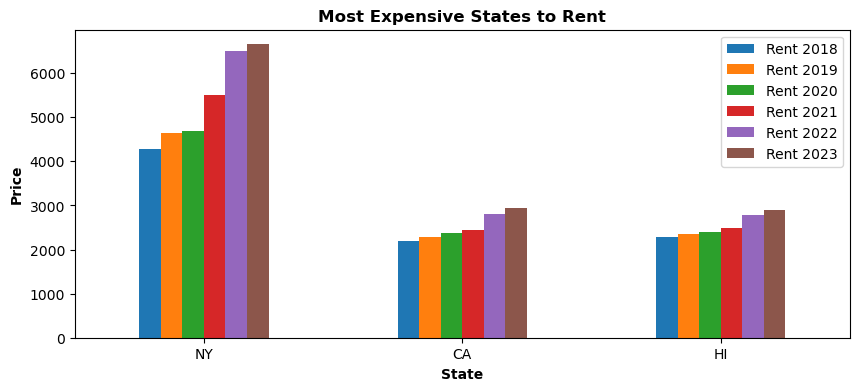

In [6]:
top.head(3).plot(kind='bar',figsize=[10,4])
plt.title('Most Expensive States to Rent', weight='bold')
plt.xlabel('State',weight='bold')
plt.ylabel('Price',weight='bold')
plt.xticks(rotation='horizontal')
plt.show()

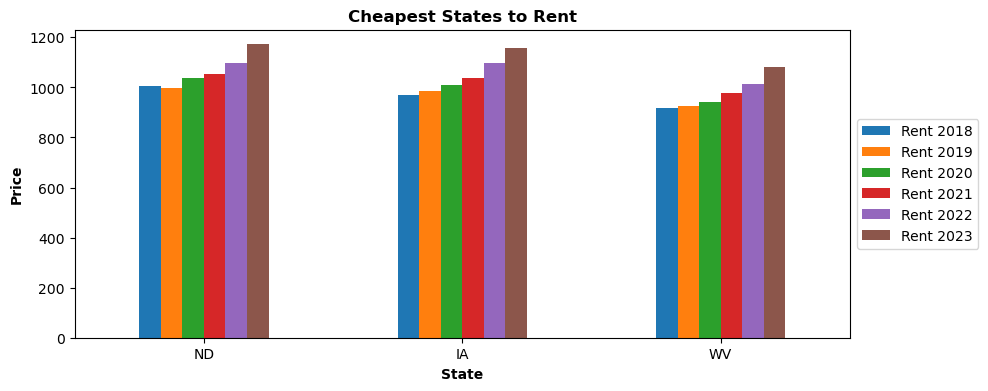

In [7]:
top.tail(3).plot(kind='bar',figsize=[10,4])
plt.title('Cheapest States to Rent', weight='bold')
plt.xlabel('State',weight='bold')
plt.ylabel('Price',weight='bold')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xticks(rotation='horizontal')
plt.show()

In [8]:
# Top 5 most expensive cities to rent in 2018
rent2018 = clean_rent.nlargest(5,'Rent 2018')
rent2018

,RegionID,SizeRank,RegionName,RegionType,StateName,State,Metro,CountyName,Rent 2018,Rent 2019,Rent 2020,Rent 2021,Rent 2022,Rent 2023
2745,829611,5171,Southampton,city,NY,NY,"New York-Newark-Jersey City, NY-NJ-PA",Suffolk County,24671.173150,27181.356740,26566.233940,33361.812690,38855.810650,40113.833330
2375,829615,3351,East Hampton,city,NY,NY,"New York-Newark-Jersey City, NY-NJ-PA",Suffolk County,18617.875210,20956.587120,21241.653480,26526.677700,33401.943340,32382.671430
2488,12520,3739,Malibu,city,CA,CA,"Los Angeles-Long Beach-Anaheim, CA",Los Angeles County,6534.942062,7219.157469,7647.894106,9103.546132,11049.112820,11516.500000
2358,17587,3311,Coronado,city,CA,CA,"San Diego-Chula Vista-Carlsbad, CA",San Diego County,4187.146069,4358.236209,4648.128478,4917.045802,6000.487438,6996.071429
1613,19177,1818,Manhattan Beach,city,CA,CA,"Los Angeles-Long Beach-Anaheim, CA",Los Angeles County,3821.901850,3905.438879,4143.139459,4196.775182,4639.544381,4992.069412


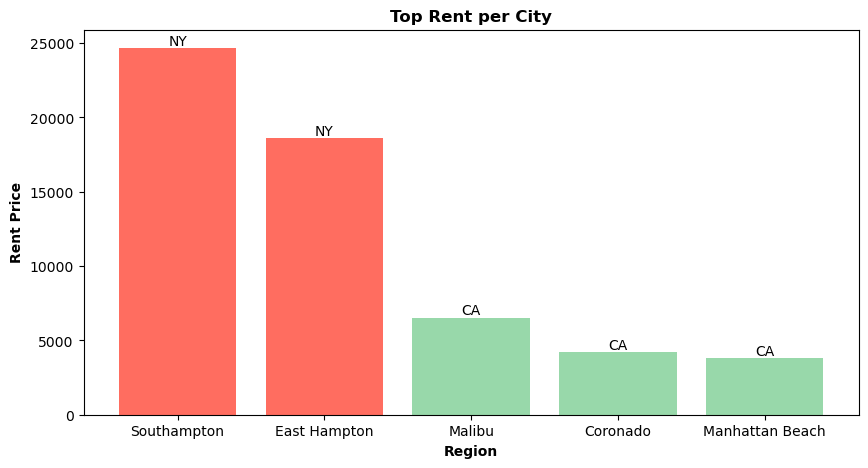

In [9]:
# Creating bar graph of the top 5 most expensive cities to rent in 2018
x_values = rent2018['RegionName']
y_values = rent2018['Rent 2018']
plt.figure(figsize=[10,5])
plt.title('Top Rent per City',weight='bold')
plt.xlabel('Region',weight='bold')
plt.ylabel('Rent Price',weight='bold')
barra = plt.bar(x_values, y_values, color=['#FF6D60','#FF6D60','#98D8AA','#98D8AA','#98D8AA'])
plt.bar_label(barra,labels = rent2018['StateName'], label_type = "edge")
plt.show()

In [10]:
# Getting the top 5 cheapest cities to rent in 2018
lowest_rent2018 = clean_rent.nsmallest(5,'Rent 2018')
lowest_rent2018

,RegionID,SizeRank,RegionName,RegionType,StateName,State,Metro,CountyName,Rent 2018,Rent 2019,Rent 2020,Rent 2021,Rent 2022,Rent 2023
582,26679,587,Rancho Cordova,city,CA,CA,"Sacramento-Roseville-Folsom, CA",Sacramento County,192.372352,196.429260,208.597742,217.773113,355.151294,2331.435606
1120,11520,1174,Frankfort,city,KY,KY,"Frankfort, KY",Franklin County,556.427760,577.798498,591.227509,645.537821,687.439022,760.333333
532,16701,537,Albany,city,GA,GA,"Albany, GA",Dougherty County,581.514897,601.639164,638.810337,690.755758,791.136941,832.847222
724,46061,737,Kokomo,city,IN,IN,"Kokomo, IN",Howard County,585.488985,613.669619,637.208084,663.279304,737.592543,805.805556
194,31471,194,Evansville,city,IN,IN,"Evansville, IN-KY",Vanderburgh County,626.238406,651.114521,679.996009,695.814621,785.017243,841.537456


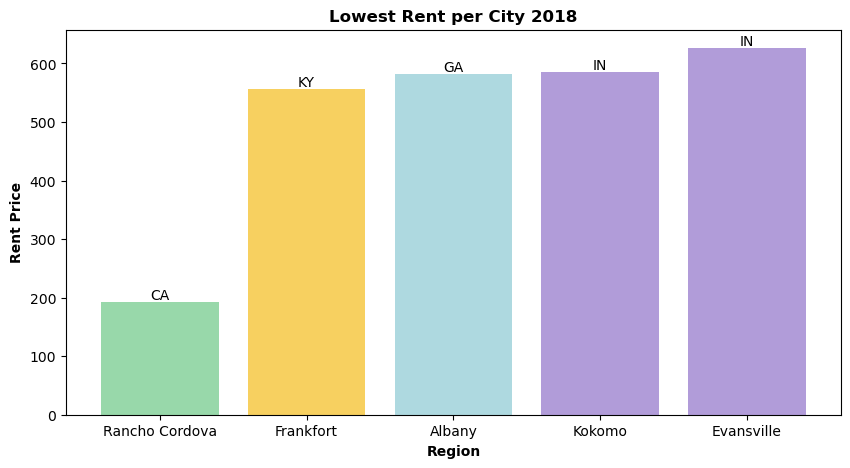

In [11]:
# Creating a bar graph of the top 5 cheapest cities to rent in 2018
x_values = lowest_rent2018['RegionName']
y_values = lowest_rent2018['Rent 2018']
plt.figure(figsize=[10,5])
plt.title('Lowest Rent per City 2018',weight='bold')
plt.xlabel('Region',weight='bold')
plt.ylabel('Rent Price',weight='bold')
barra = plt.bar(x_values, y_values, color=['#98D8AA','#F7D060','#AED9E0','#B19CD9','#B19CD9'])
plt.bar_label(barra,labels = lowest_rent2018['StateName'], label_type = "edge")
plt.show()

In [12]:
# Getting the top 5 most expensive cities to rent in 2023
h_rent2023 = clean_rent.nlargest(5,'Rent 2023')
h_rent2023

,RegionID,SizeRank,RegionName,RegionType,StateName,State,Metro,CountyName,Rent 2018,Rent 2019,Rent 2020,Rent 2021,Rent 2022,Rent 2023
2745,829611,5171,Southampton,city,NY,NY,"New York-Newark-Jersey City, NY-NJ-PA",Suffolk County,24671.173150,27181.356740,26566.233940,33361.812690,38855.810650,40113.833330
2375,829615,3351,East Hampton,city,NY,NY,"New York-Newark-Jersey City, NY-NJ-PA",Suffolk County,18617.875210,20956.587120,21241.653480,26526.677700,33401.943340,32382.671430
2488,12520,3739,Malibu,city,CA,CA,"Los Angeles-Long Beach-Anaheim, CA",Los Angeles County,6534.942062,7219.157469,7647.894106,9103.546132,11049.112820,11516.500000
2358,17587,3311,Coronado,city,CA,CA,"San Diego-Chula Vista-Carlsbad, CA",San Diego County,4187.146069,4358.236209,4648.128478,4917.045802,6000.487438,6996.071429
1613,19177,1818,Manhattan Beach,city,CA,CA,"Los Angeles-Long Beach-Anaheim, CA",Los Angeles County,3821.901850,3905.438879,4143.139459,4196.775182,4639.544381,4992.069412


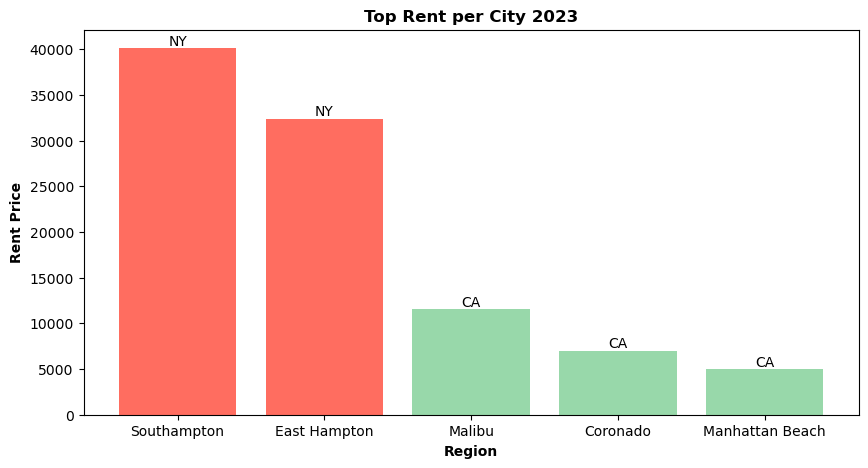

In [13]:
# Creating a bar graph of the top 5 most expensive cities to rent in 2023
x_values = h_rent2023['RegionName']
y_values = h_rent2023['Rent 2023']
plt.figure(figsize=[10,5])
plt.title('Top Rent per City 2023', weight='bold')
plt.xlabel('Region',weight='bold')
plt.ylabel('Rent Price',weight='bold')
barra = plt.bar(x_values, y_values, color=['#FF6D60','#FF6D60','#98D8AA','#98D8AA','#98D8AA'])
plt.bar_label(barra,labels = h_rent2023['StateName'], label_type = "edge")
plt.show()

In [14]:
# Getting the top 5 cheapest cities to rent in 2023
lowest_rent2023 = clean_rent.nsmallest(5,'Rent 2023')
lowest_rent2023

,RegionID,SizeRank,RegionName,RegionType,StateName,State,Metro,CountyName,Rent 2018,Rent 2019,Rent 2020,Rent 2021,Rent 2022,Rent 2023
1120,11520,1174,Frankfort,city,KY,KY,"Frankfort, KY",Franklin County,556.427760,577.798498,591.227509,645.537821,687.439022,760.333333
724,46061,737,Kokomo,city,IN,IN,"Kokomo, IN",Howard County,585.488985,613.669619,637.208084,663.279304,737.592543,805.805556
532,16701,537,Albany,city,GA,GA,"Albany, GA",Dougherty County,581.514897,601.639164,638.810337,690.755758,791.136941,832.847222
194,31471,194,Evansville,city,IN,IN,"Evansville, IN-KY",Vanderburgh County,626.238406,651.114521,679.996009,695.814621,785.017243,841.537456
571,17394,576,Charleston,city,WV,WV,"Charleston, WV",Kanawha County,719.057124,723.681086,733.378824,758.491366,776.148401,842.638889


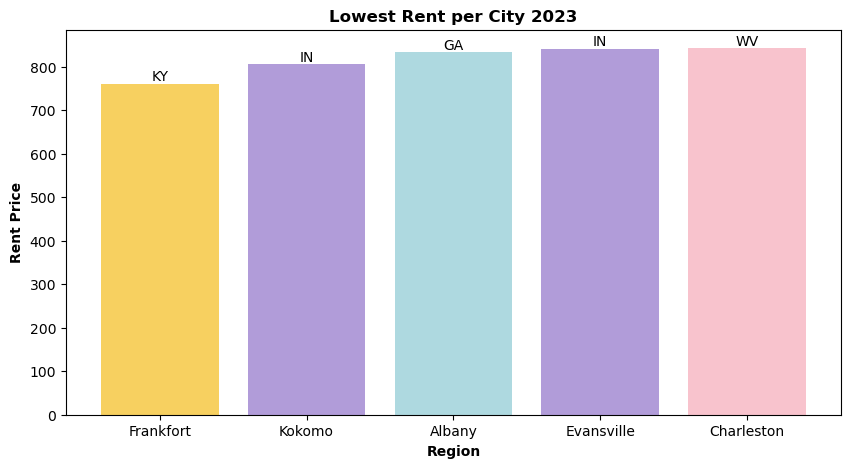

In [15]:
# Creating a bar graph of the top 5 cheapest cities to rent in 2023 
x_values = lowest_rent2023['RegionName']
y_values = lowest_rent2023['Rent 2023']
plt.figure(figsize=[10,5])
plt.title('Lowest Rent per City 2023',weight='bold')
plt.xlabel('Region',weight='bold')
plt.ylabel('Rent Price',weight='bold')
barra = plt.bar(x_values, y_values, color=['#F7D060','#B19CD9','#AED9E0','#B19CD9','#F8C3CD'])
plt.bar_label(barra,labels = lowest_rent2023['StateName'], label_type = "edge")
plt.show()

In [16]:
# Reading the data frame of the information of the house price and sales csv file
# This data frame only includes the 65% - 95% of the avaiable infomation depending of the state (it excludes overated prices)
sale = pd.read_csv('./data/sale_average.csv', low_memory=False)
sale

,RegionID,SizeRank,RegionName,STATE,RegionType,StateName,3/31/2018,3/31/2019,3/31/2020,3/31/2021,3/31/2022,3/31/2023
0,102001,0,United States,NaN,country,NaN,440205,459277,476365,531132,626292,634323
1,394913,1,New York,NY,msa,NY,747283,778972,796005,841538,932638,950897
2,753899,2,Los Angeles,CA,msa,CA,1062302,1118259,1151957,1260133,1514660,1475178
3,394463,3,Chicago,IL,msa,IL,390772,393919,393570,419975,460921,468498
4,394514,4,Dallas,TX,msa,TX,406874,415222,426361,469883,578203,593395
...,...,...,...,...,...,...,...,...,...,...,...,...
891,753929,935,Zapata,TX,msa,TX,158239,157141,164499,173431,186827,193405
892,394743,936,Ketchikan,AK,msa,AK,434775,462425,493206,526160,549980,556073
893,753874,937,Craig,CO,msa,CO,261847,271615,288996,320362,372575,396149
894,395188,938,Vernon,TX,msa,TX,109351,113756,118973,132358,154891,161931


In [17]:
# Cleaning the information of the data frame of price and sales
clean_sale = sale.dropna()
clean_sale.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 895 entries, 1 to 895
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   RegionID    895 non-null    int64 
 1   SizeRank    895 non-null    int64 
 2   RegionName  895 non-null    object
 3   STATE       895 non-null    object
 4   RegionType  895 non-null    object
 5   StateName   895 non-null    object
 6   3/31/2018   895 non-null    int64 
 7   3/31/2019   895 non-null    int64 
 8   3/31/2020   895 non-null    int64 
 9   3/31/2021   895 non-null    int64 
 10  3/31/2022   895 non-null    int64 
 11  3/31/2023   895 non-null    int64 
dtypes: int64(8), object(4)
memory usage: 90.9+ KB


In [18]:
# Renaming the columns of the data frame
clean_sale = clean_sale.rename(columns={
    "3/31/2018":'Sale 2018', 
    "3/31/2019":'Sale 2019', 
    "3/31/2020":'Sale 2020', 
    "3/31/2021":'Sale 2021', 
    "3/31/2022":'Sale 2022', 
    "3/31/2023":'Sale 2023'
})

clean_sale

,RegionID,SizeRank,RegionName,STATE,RegionType,StateName,Sale 2018,Sale 2019,Sale 2020,Sale 2021,Sale 2022,Sale 2023
1,394913,1,New York,NY,msa,NY,747283,778972,796005,841538,932638,950897
2,753899,2,Los Angeles,CA,msa,CA,1062302,1118259,1151957,1260133,1514660,1475178
3,394463,3,Chicago,IL,msa,IL,390772,393919,393570,419975,460921,468498
4,394514,4,Dallas,TX,msa,TX,406874,415222,426361,469883,578203,593395
5,394692,5,Houston,TX,msa,TX,352901,361996,371257,402063,471220,490112
...,...,...,...,...,...,...,...,...,...,...,...,...
891,753929,935,Zapata,TX,msa,TX,158239,157141,164499,173431,186827,193405
892,394743,936,Ketchikan,AK,msa,AK,434775,462425,493206,526160,549980,556073
893,753874,937,Craig,CO,msa,CO,261847,271615,288996,320362,372575,396149
894,395188,938,Vernon,TX,msa,TX,109351,113756,118973,132358,154891,161931


In [19]:
# Getting an average of the sales per each year
sale_2023 = clean_sale.groupby('StateName')['Sale 2023'].mean()
sale_2022 = clean_sale.groupby('StateName')['Sale 2022'].mean()
sale_2021 = clean_sale.groupby('StateName')['Sale 2021'].mean()
sale_2020 = clean_sale.groupby('StateName')['Sale 2020'].mean()
sale_2019 = clean_sale.groupby('StateName')['Sale 2019'].mean()
sale_2018 = clean_sale.groupby('StateName')['Sale 2018'].mean()

# Creating a new data frame using the new informaton
sale_increase = pd.DataFrame({
    "Sale 2018": sale_2018,
    "Sale 2019": sale_2019,
    "Sale 2020": sale_2020,
    "Sale 2021": sale_2021,
    "Sale 2022": sale_2022,
    "Sale 2023": sale_2023
})

# Sorting the hpuse sales per each year in a descending order
top_sale = sale_increase.sort_values(by="Sale 2023",ascending=False).round()

# Getting the top 5 most expensive cities to buy a house per each year
top_sale.head()

,Sale 2018,Sale 2019,Sale 2020,Sale 2021,Sale 2022,Sale 2023
StateName,,,,,,
HI,890872.0,925834.0,942958.0,1041080.0,1299386.0,1353845.0
MA,693646.0,731886.0,752919.0,857197.0,1032685.0,1087423.0
CO,627762.0,669516.0,698859.0,814406.0,1021272.0,1038161.0
CA,659194.0,667207.0,690505.0,775272.0,922623.0,883180.0
UT,471266.0,508774.0,541632.0,632249.0,790999.0,780189.0


In [20]:
# Setting the values of the interest rate of each year

Int_2018 = .0454
Int_2019 = .0394
Int_2020 = .0310
Int_2021 = .0296
Int_2022 = .0534
Int_2023 = .0654

In [21]:
# Getting the monthly payment per each year using the interes variable previusly declared

top_sale['Mtly_pmt 2018'] = top_sale['Sale 2018'] * ((Int_2018/12) / (1 - (1 + (Int_2018/12))**(-360)))
top_sale['Mtly_pmt 2019'] = top_sale['Sale 2019'] * ((Int_2019/12) / (1 - (1 + (Int_2019/12))**(-360)))
top_sale['Mtly_pmt 2020'] = top_sale['Sale 2020'] * ((Int_2020/12) / (1 - (1 + (Int_2020/12))**(-360)))
top_sale['Mtly_pmt 2021'] = top_sale['Sale 2021'] * ((Int_2021/12) / (1 - (1 + (Int_2021/12))**(-360)))
top_sale['Mtly_pmt 2022'] = top_sale['Sale 2022'] * ((Int_2022/12) / (1 - (1 + (Int_2022/12))**(-360)))
top_sale['Mtly_pmt 2023'] = top_sale['Sale 2023'] * ((Int_2023/12) / (1 - (1 + (Int_2023/12))**(-360)))

# Calculating the total amount that will be paid in 30 years and the extra percentage that will be paid in interests
top_sale['Total Paid 2018'] = top_sale['Mtly_pmt 2018'] * 360
top_sale['% Paid 2018'] = (top_sale['Total Paid 2018'] - top_sale['Sale 2018']) / top_sale['Sale 2018']

top_sale['Total Paid 2019'] = top_sale['Mtly_pmt 2019'] * 360
top_sale['% Paid 2019'] = (top_sale['Total Paid 2019'] - top_sale['Sale 2019']) / top_sale['Sale 2019']

top_sale['Total Paid 2020'] = top_sale['Mtly_pmt 2020'] * 360
top_sale['% Paid 2020'] = (top_sale['Total Paid 2020'] - top_sale['Sale 2020']) / top_sale['Sale 2020']

top_sale['Total Paid 2021'] = top_sale['Mtly_pmt 2021'] * 360
top_sale['% Paid 2021'] = (top_sale['Total Paid 2021'] - top_sale['Sale 2021']) / top_sale['Sale 2021']

top_sale['Total Paid 2022'] = top_sale['Mtly_pmt 2022'] * 360
top_sale['% Paid 2022'] = (top_sale['Total Paid 2022'] - top_sale['Sale 2022']) / top_sale['Sale 2022']

top_sale['Total Paid 2023'] = top_sale['Mtly_pmt 2023'] * 360
top_sale['% Paid 2023'] = (top_sale['Total Paid 2023'] - top_sale['Sale 2023']) / top_sale['Sale 2023']


top_sale.round(2)

,Sale 2018,Sale 2019,Sale 2020,Sale 2021,Sale 2022,Sale 2023,Mtly_pmt 2018,Mtly_pmt 2019,Mtly_pmt 2020,Mtly_pmt 2021,...,Total Paid 2019,% Paid 2019,Total Paid 2020,% Paid 2020,Total Paid 2021,% Paid 2021,Total Paid 2022,% Paid 2022,Total Paid 2023,% Paid 2023
StateName,,,,,,,,,,,,,,,,,,,,,
HI,890872.0,925834.0,942958.0,1041080.0,1299386.0,1353845.0,4535.12,4388.11,4026.59,4366.81,...,1579718.84,0.71,1449570.71,0.54,1572050.88,0.51,2609230.06,1.01,3093431.99,1.28
MA,693646.0,731886.0,752919.0,857197.0,1032685.0,1087423.0,3531.11,3468.87,3215.09,3595.51,...,1248792.01,0.71,1157431.54,0.54,1294384.01,0.51,2073681.53,1.01,2484678.15,1.28
CO,627762.0,669516.0,698859.0,814406.0,1021272.0,1038161.0,3195.72,3173.26,2984.24,3416.02,...,1142372.22,0.71,1074327.31,0.54,1229768.77,0.51,2050763.67,1.01,2372118.26,1.28
CA,659194.0,667207.0,690505.0,775272.0,922623.0,883180.0,3355.72,3162.31,2948.57,3251.88,...,1138432.45,0.71,1061485.05,0.54,1170675.68,0.51,1852671.70,1.01,2017998.56,1.28
UT,471266.0,508774.0,541632.0,632249.0,790999.0,780189.0,2399.05,2411.40,2312.86,2651.97,...,868103.65,0.71,832628.69,0.54,954708.19,0.51,1588364.33,1.01,1782672.03,1.28
WY,448654.0,472724.0,507986.0,564604.0,683437.0,723043.0,2283.94,2240.54,2169.18,2368.23,...,806592.77,0.71,780906.07,0.54,852562.93,0.51,1372374.62,1.01,1652097.80,1.28
ID,400536.0,425550.0,461305.0,564882.0,707464.0,701197.0,2038.99,2016.95,1969.85,2369.40,...,726101.39,0.71,709145.28,0.54,852982.72,0.51,1420622.00,1.01,1602181.36,1.28
NJ,432257.0,453490.0,469898.0,536228.0,661746.0,689242.0,2200.47,2149.37,2006.54,2249.21,...,773774.45,0.71,722354.95,0.54,809714.62,0.51,1328818.04,1.01,1574865.11,1.28
MT,404306.0,424194.0,450038.0,524270.0,652096.0,660366.0,2058.18,2010.52,1921.74,2199.05,...,723787.69,0.71,691824.98,0.54,791657.81,0.51,1309440.37,1.01,1508885.66,1.28


In [22]:
# Resetting the index of both data frames
topsales = top_sale.reset_index()
top = top.reset_index()

# Renaming the columns
top = top.rename(columns={'State': 'StateName'})
top.head()

,StateName,Rent 2018,Rent 2019,Rent 2020,Rent 2021,Rent 2022,Rent 2023
0,NY,4272.415933,4640.856538,4678.192134,5509.537419,6506.621057,6649.925170
1,CA,2189.997581,2288.799730,2366.955258,2439.551273,2794.249868,2930.340710
2,HI,2282.421408,2357.816960,2396.524964,2486.421919,2776.823981,2897.967213
3,MA,2024.887089,2107.112436,2177.489343,2107.428271,2417.146859,2633.743294
4,NJ,2005.196510,2055.392820,2121.171289,2127.631557,2378.039085,2591.863801


In [23]:
# Merging the two data frames (rent and sales) using the column "StateName"
merged_df = pd.merge(top, topsales, on='StateName')
merged_df.head()

,StateName,Rent 2018,Rent 2019,Rent 2020,Rent 2021,Rent 2022,Rent 2023,Sale 2018,Sale 2019,Sale 2020,...,Total Paid 2019,% Paid 2019,Total Paid 2020,% Paid 2020,Total Paid 2021,% Paid 2021,Total Paid 2022,% Paid 2022,Total Paid 2023,% Paid 2023
0,NY,4272.415933,4640.856538,4678.192134,5509.537419,6506.621057,6649.925170,249822.0,258171.0,266954.0,...,4.405083e+05,0.706266,4.103774e+05,0.537259,4.505263e+05,0.510019,6.747364e+05,1.008048,7.977421e+05,1.284923
1,CA,2189.997581,2288.799730,2366.955258,2439.551273,2794.249868,2930.340710,659194.0,667207.0,690505.0,...,1.138432e+06,0.706266,1.061485e+06,0.537259,1.170676e+06,0.510019,1.852672e+06,1.008048,2.017999e+06,1.284923
2,HI,2282.421408,2357.816960,2396.524964,2486.421919,2776.823981,2897.967213,890872.0,925834.0,942958.0,...,1.579719e+06,0.706266,1.449571e+06,0.537259,1.572051e+06,0.510019,2.609230e+06,1.008048,3.093432e+06,1.284923
3,MA,2024.887089,2107.112436,2177.489343,2107.428271,2417.146859,2633.743294,693646.0,731886.0,752919.0,...,1.248792e+06,0.706266,1.157432e+06,0.537259,1.294384e+06,0.510019,2.073682e+06,1.008048,2.484678e+06,1.284923
4,NJ,2005.196510,2055.392820,2121.171289,2127.631557,2378.039085,2591.863801,432257.0,453490.0,469898.0,...,7.737745e+05,0.706266,7.223549e+05,0.537259,8.097146e+05,0.510019,1.328818e+06,1.008048,1.574865e+06,1.284923


In [35]:
# Getting the top 5 most expensive rents in 2018
t_rent2018 = merged_df.nlargest(5, 'Rent 2018')
t_rent2018 = t_rent2018.sort_index() 
t_rent2018 

,StateName,Rent 2018,Rent 2019,Rent 2020,Rent 2021,Rent 2022,Rent 2023,Sale 2018,Sale 2019,Sale 2020,...,Total Paid 2019,% Paid 2019,Total Paid 2020,% Paid 2020,Total Paid 2021,% Paid 2021,Total Paid 2022,% Paid 2022,Total Paid 2023,% Paid 2023
0,NY,4272.415933,4640.856538,4678.192134,5509.537419,6506.621057,6649.925170,249822.0,258171.0,266954.0,...,4.405083e+05,0.706266,4.103774e+05,0.537259,4.505263e+05,0.510019,6.747364e+05,1.008048,7.977421e+05,1.284923
1,CA,2189.997581,2288.799730,2366.955258,2439.551273,2794.249868,2930.340710,659194.0,667207.0,690505.0,...,1.138432e+06,0.706266,1.061485e+06,0.537259,1.170676e+06,0.510019,1.852672e+06,1.008048,2.017999e+06,1.284923
2,HI,2282.421408,2357.816960,2396.524964,2486.421919,2776.823981,2897.967213,890872.0,925834.0,942958.0,...,1.579719e+06,0.706266,1.449571e+06,0.537259,1.572051e+06,0.510019,2.609230e+06,1.008048,3.093432e+06,1.284923
3,MA,2024.887089,2107.112436,2177.489343,2107.428271,2417.146859,2633.743294,693646.0,731886.0,752919.0,...,1.248792e+06,0.706266,1.157432e+06,0.537259,1.294384e+06,0.510019,2.073682e+06,1.008048,2.484678e+06,1.284923
4,NJ,2005.196510,2055.392820,2121.171289,2127.631557,2378.039085,2591.863801,432257.0,453490.0,469898.0,...,7.737745e+05,0.706266,7.223549e+05,0.537259,8.097146e+05,0.510019,1.328818e+06,1.008048,1.574865e+06,1.284923


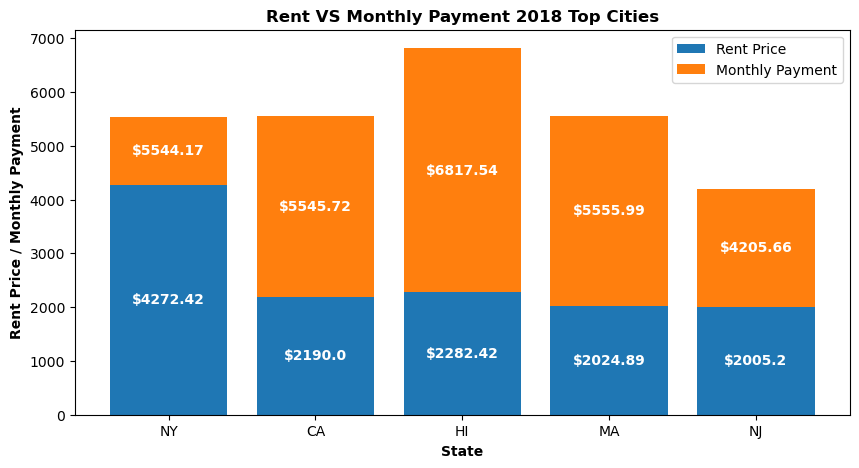

In [36]:
# Creating a bar graph showing the difference between renting a house and buying it per city in 2018
x_values = t_rent2018['StateName']
y_values1 = t_rent2018['Rent 2018']
y_values2 = t_rent2018['Mtly_pmt 2018']
plt.figure(figsize=[10,5])
plt.title('Rent VS Monthly Payment 2018 Top Cities', weight='bold')
plt.xlabel('State',weight='bold')
plt.ylabel('Rent Price / Monthly Payment',weight='bold')
bar1 = plt.bar(x_values, y_values1, label='Rent Price')
bar2 = plt.bar(x_values, y_values2, label='Monthly Payment', bottom=y_values1)
for i, rent in enumerate(y_values1):
    plt.annotate(f'${round(rent, 2)}', xy=(i, rent/2), ha='center', va='center', color='white', weight='bold')

for i, payment in enumerate(y_values2):
    total_height = y_values1[i] + y_values2[i]
    plt.annotate(f'${round(total_height,2)}', xy=(i, total_height - y_values2[i]/2), ha='center', va='center', color='white', weight='bold')


plt.legend()
plt.show()

In [33]:
t_rent2018['Mtly_pmt 2018']

0    1271.755838
2    4535.115672
1    3355.724549
3    3531.107550
4    2200.468187
Name: Mtly_pmt 2018, dtype: float64

In [34]:
t_rent2018['Rent 2018']


0    4272.415933
2    2282.421408
1    2189.997581
3    2024.887089
4    2005.196510
Name: Rent 2018, dtype: float64

In [26]:
# Getting the top 5 most expensive rents in 2023
t_rent2023 = merged_df.nlargest(5, 'Rent 2023')

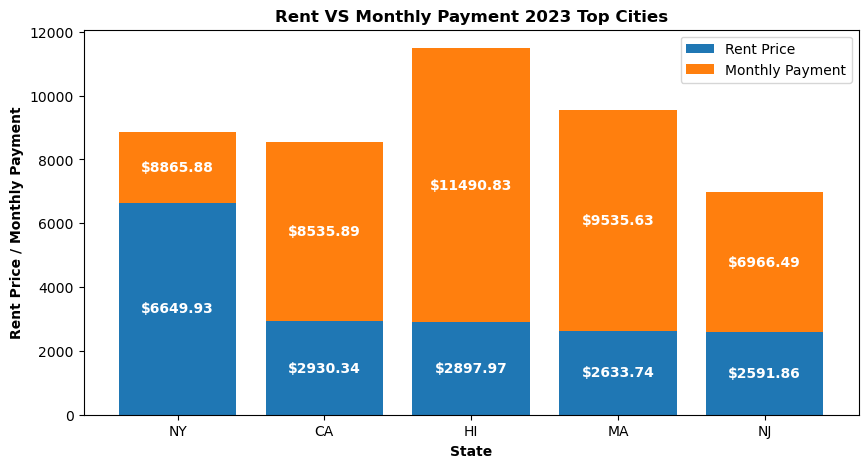

In [27]:
# Creating a bar graph showing the difference between renting a house and buying it per city in 2023
x_values = t_rent2023['StateName']
y_values1 = t_rent2023['Rent 2023']
y_values2 = t_rent2023['Mtly_pmt 2023']
plt.figure(figsize=[10,5])
plt.title('Rent VS Monthly Payment 2023 Top Cities', weight='bold')
plt.xlabel('State',weight='bold')
plt.ylabel('Rent Price / Monthly Payment',weight='bold')
bar1 = plt.bar(x_values, y_values1, label='Rent Price')
bar2 = plt.bar(x_values, y_values2, label='Monthly Payment', bottom=y_values1)
for i, rent in enumerate(y_values1):
    plt.annotate(f'${round(rent, 2)}', xy=(i, rent/2), ha='center', va='center', color='white', weight='bold')

for i, payment in enumerate(y_values2):
    total_height = y_values1[i] + y_values2[i]
    plt.annotate(f'${round(total_height,2)}', xy=(i, total_height - y_values2[i]/2), ha='center', va='center', color='white', weight='bold')


plt.legend()
plt.show()

In [28]:
# Creating the percentage of the interest reate per each year
int2018 = Int_2018 * 100
int2019 = Int_2019 * 100
int2020 = Int_2020 * 100
int2021 = Int_2021 * 100
int2022 = Int_2022 * 100
int2023 = Int_2023 * 100

In [29]:
# Specify the index labels
index = ['Interest']

# Create a list of lists with the values
data = [int2018], [int2019], [int2020], [int2021], [int2022], [int2023]
data
years = ['2018', '2019', '2020', '2021', '2022', '2023']
years

['2018', '2019', '2020', '2021', '2022', '2023']

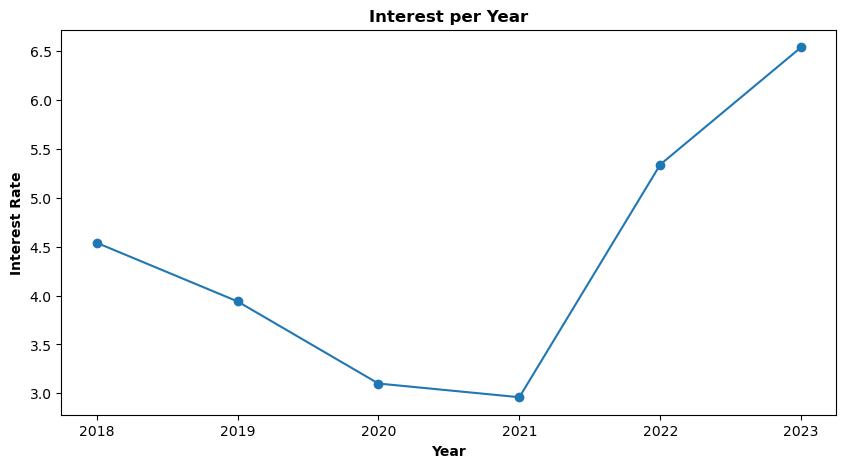

In [30]:
# Creating a linear graph to show the changes of the interest rate per each year

x_values = years
y_values = data

plt.figure(figsize=[10,5])
plt.title('Interest per Year', weight='bold')
plt.xlabel('Year', weight='bold')
plt.ylabel('Interest Rate', weight='bold')
plt.plot(x_values, y_values, marker='o')
plt.show()